# Convergent
A one step method difference equation is said to be __convergent__ with respect to
the differential equation and $w_i$, the approximation obtained from the difference
method at the ith step.
$$ \max_{h \rightarrow 0}\max_{1 \leq i \leq N}|y(t_i)-w_i|=0$$
All the Runge Kutta, and Adams methods are convergent in this course.

This notebook will illustrate a non-convergent method using the Abysmal-Butler method.

## Intial Value Problem
The differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1,$$
will be the used to illustrate this.

## Python Libraries

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=b−ah.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a.$

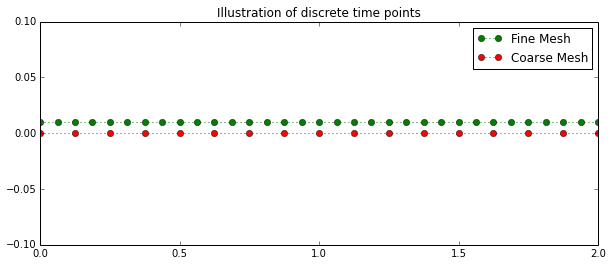

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=16
h=(b-a)/(N)
t=np.arange(a,b+h,h)
N2=N*2
h2=(b-a)/(N2)
t2=np.arange(a,b+h2,h2)
w2=np.zeros(len(t2))
fig = plt.figure(figsize=(10,4))
fig = plt.figure(figsize=(10,4))
plt.plot(t2,0.01*np.ones(len(t2)),'o:',color='green',label='Fine Mesh')
plt.plot(t,0*t,'o:',color='red',label='Coarse Mesh')
plt.xlim((0,2))
plt.ylim((-0.1,.1))

plt.legend()
plt.title('Illustration of discrete time points')



## 2-step Abysmal Butler Method 

The 2-step Abysmal Butler difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})) $$

For $i=0$ the system of difference equation is:
$$w_{1} = w_{0} + \frac{h}{2}(4(t_0-w_0)-3(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(4(t_1-w_1)-3(t_{0}-w_{0})) $$
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [5]:
### Initial conditions
IC=1
w=np.zeros(len(t))
w[0]=IC

w2=np.zeros(len(t2))
w2[0]=IC
w2[1]=(IC+1)*np.exp(-t2[1])+t2[1]-1

### Loop

In [6]:


# Fine Mesh
for k in range (1,N2):
    w2[k+1]=(w2[k]+h2/2.0*(4*myfun_ty(t2[k],w2[k])-3*myfun_ty(t2[k-1],w2[k-1]))) 
    
    
w[1]=w2[2]

# Coarse Mesh
for k in range (1,N):
    w[k+1]=(w[k]+h/2.0*(4*myfun_ty(t[k],w[k])-3*myfun_ty(t[k-1],w[k-1])))   


### Plotting solution

In [9]:
def plotting(t,w,t2,w2):
    y=(2)*np.exp(-t2)+t2-1
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,w,'^:',color='red',label='Coarse Mesh (N)')
    plt.plot(t2,w2, 'v-',color='green',label='Fine Mesh (2N)')
    plt.plot(t2,y, 'o-',color='black',label='Exact?')
    plt.xlabel('time')
    plt.legend()
    plt.title('Abysmal Butler')
    plt.show 

The plot below shows the Abysmal-Butler approximation for a low N (red) and $N\times2$ (green) and the exact solution (black) of the intial value problem

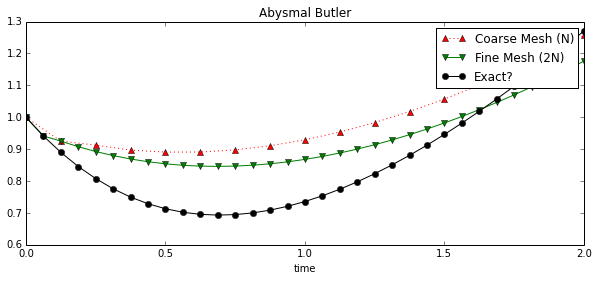

In [10]:
plotting(t,w,t2,w2)

## Convergent 
The Abysmal-Butler method does satisfy the Lipschitz condition:
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}f(t,w_i)-\frac{3}{2}f(t-h,w_{i-1}))-(\frac{4}{2}f(t,\hat{w}_{i})-\frac{3}{2}f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}(f(t,w_i)-f(t,\hat{w}_i))-\frac{3}{2}(f(t-h,w_{i-1}))-f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)\leq\frac{4}{2}L|w_i-\hat{w_i}|+\frac{3}{2}L|w-\hat{w}|\leq \frac{7}{2} L|w_i-\hat{w_i}|$$
This means it is internally convergent,
$$|w_i-w^2_i|\rightarrow 0$$ 
as $h \rightarrow 0$,
but as it is not consistent it will never converge to the exact solution
$$ |y_i-w_i| \not= 0$$.


In [11]:
table = ListTable()
table.append(['time', 'Abysmal Butler w','Abysmal Butler w2 N*2','|w-w2|'])
for i in range (0,len(t),4):
    table.append([round(t[i],3), round(w[i],3), round(w2[2*i],3),round(abs(w[i]-w2[2*i]),5)])
table

time,Abysmal Butler w,Abysmal Butler w2 N*2,|w-w2|
0.0,1.0,1.0,0.0
0.5,0.891,0.854,0.03681
1.0,0.929,0.868,0.0616
1.5,1.057,0.982,0.07506
2.0,1.257,1.176,0.08069
